# Data Analyst Professional Practical Exam 



## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

## Load & Clean 

## Project: Product Sales Analysis for New Stationery Line
## Company: Pens and Printers
## Prepared by: Head of Analytics

Here after taking the quick glimse at data
- we have 15000 rows with 8 column
- By observing the summary of dataframe most of the columns donot have null values       except revenue
- Describe heps to observe the summary stats for all the numeric columns so that we can spot the ouliers and observe the distribution and scale of values 

In [6]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("product_sales.csv")

# Preview
print(df.head())
print(df.info())
print(df.describe())


   week  sales_method                           customer_id  nb_sold  revenue  \
0     2         Email  2e72d641-95ac-497b-bbf8-4861764a7097       10      NaN   
1     6  Email + Call  3998a98d-70f5-44f7-942e-789bb8ad2fe7       15   225.47   
2     5          Call  d1de9884-8059-4065-b10f-86eef57e4a44       11    52.55   
3     4         Email  78aa75a4-ffeb-4817-b1d0-2f030783c5d7       11      NaN   
4     3         Email  10e6d446-10a5-42e5-8210-1b5438f70922        9    90.49   

   years_as_customer  nb_site_visits      state  
0                  0              24    Arizona  
1                  1              28     Kansas  
2                  6              26  Wisconsin  
3                  3              25    Indiana  
4                  0              28   Illinois  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week

## observations

- There are outliers in years_as_customer
- Null values needed to be removed from revenue 

## Data validation 

- Revenue  has null values so replace those
- Keeping rows where revenue greater than zero and avoiding nulls 
- All the nulls in revenue is removed and now the size becomes -- 13,926 * 8

In [7]:
#Data validation 

#check nulls
print(df.isnull().sum())


df = df[(df['revenue'] >= 0)]

#checking nulls after replacement 
print(df.isnull().sum())
 

#checking for unique values and count of them
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values, type: {df[col].dtype}")
#what nunique function does


week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64
week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64
week: 6 unique values, type: int64
sales_method: 5 unique values, type: object
customer_id: 13926 unique values, type: object
nb_sold: 10 unique values, type: int64
revenue: 6743 unique values, type: float64
years_as_customer: 42 unique values, type: int64
nb_site_visits: 26 unique values, type: int64
state: 50 unique values, type: object


## Exploratory Data Analysis and Visualization 

- Unique values of sales_method is when observed we can check how customer distribution we can categorize the customers based on each sales_method
- create the fucntion to categorize sales methods correctly
- As there are not actually 5 different methods em+call is nothing but Email+call
- Method results in 3 categories
- Customers per Sales Method plot  is built

5
['Email + Call' 'Call' 'Email' 'em + call' 'email']
['Email' 'Call' 'Email + Call']


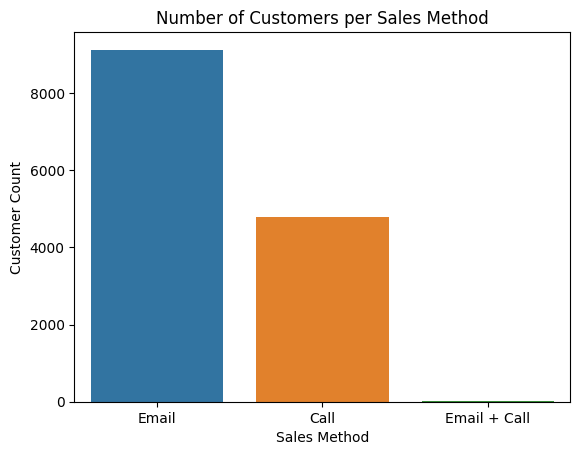

In [8]:

print(df["sales_method"].nunique())
print(df["sales_method"].unique())

def clean_sales_method(method):
    method = method.strip().lower()
    if 'em + call' in method:
        return 'Email + Call'
    elif 'email' in method:
        return 'Email'
    else:
        return 'Call'
df['sales_method'] = df['sales_method'].apply(clean_sales_method)

#checking final sales methods
print(df["sales_method"].unique())

df.to_csv('corrected_data.csv', index=False)
#plot to check Customers per Sales Method
sns.countplot(x='sales_method', data=df,hue='sales_method')
plt.title("Number of Customers per Sales Method")
plt.xlabel("Sales Method")
plt.ylabel("Customer Count")
plt.show()




## Observations

-there are 3 types of sales methods and most of the customers are cosidering email as sales_method 

## Revenue Distribution

- How revenue is distruibuted w.r.t customers in sales
- Consider Revenue in X axis and bulid a histogram and differentiated based on sales_methos as hue 


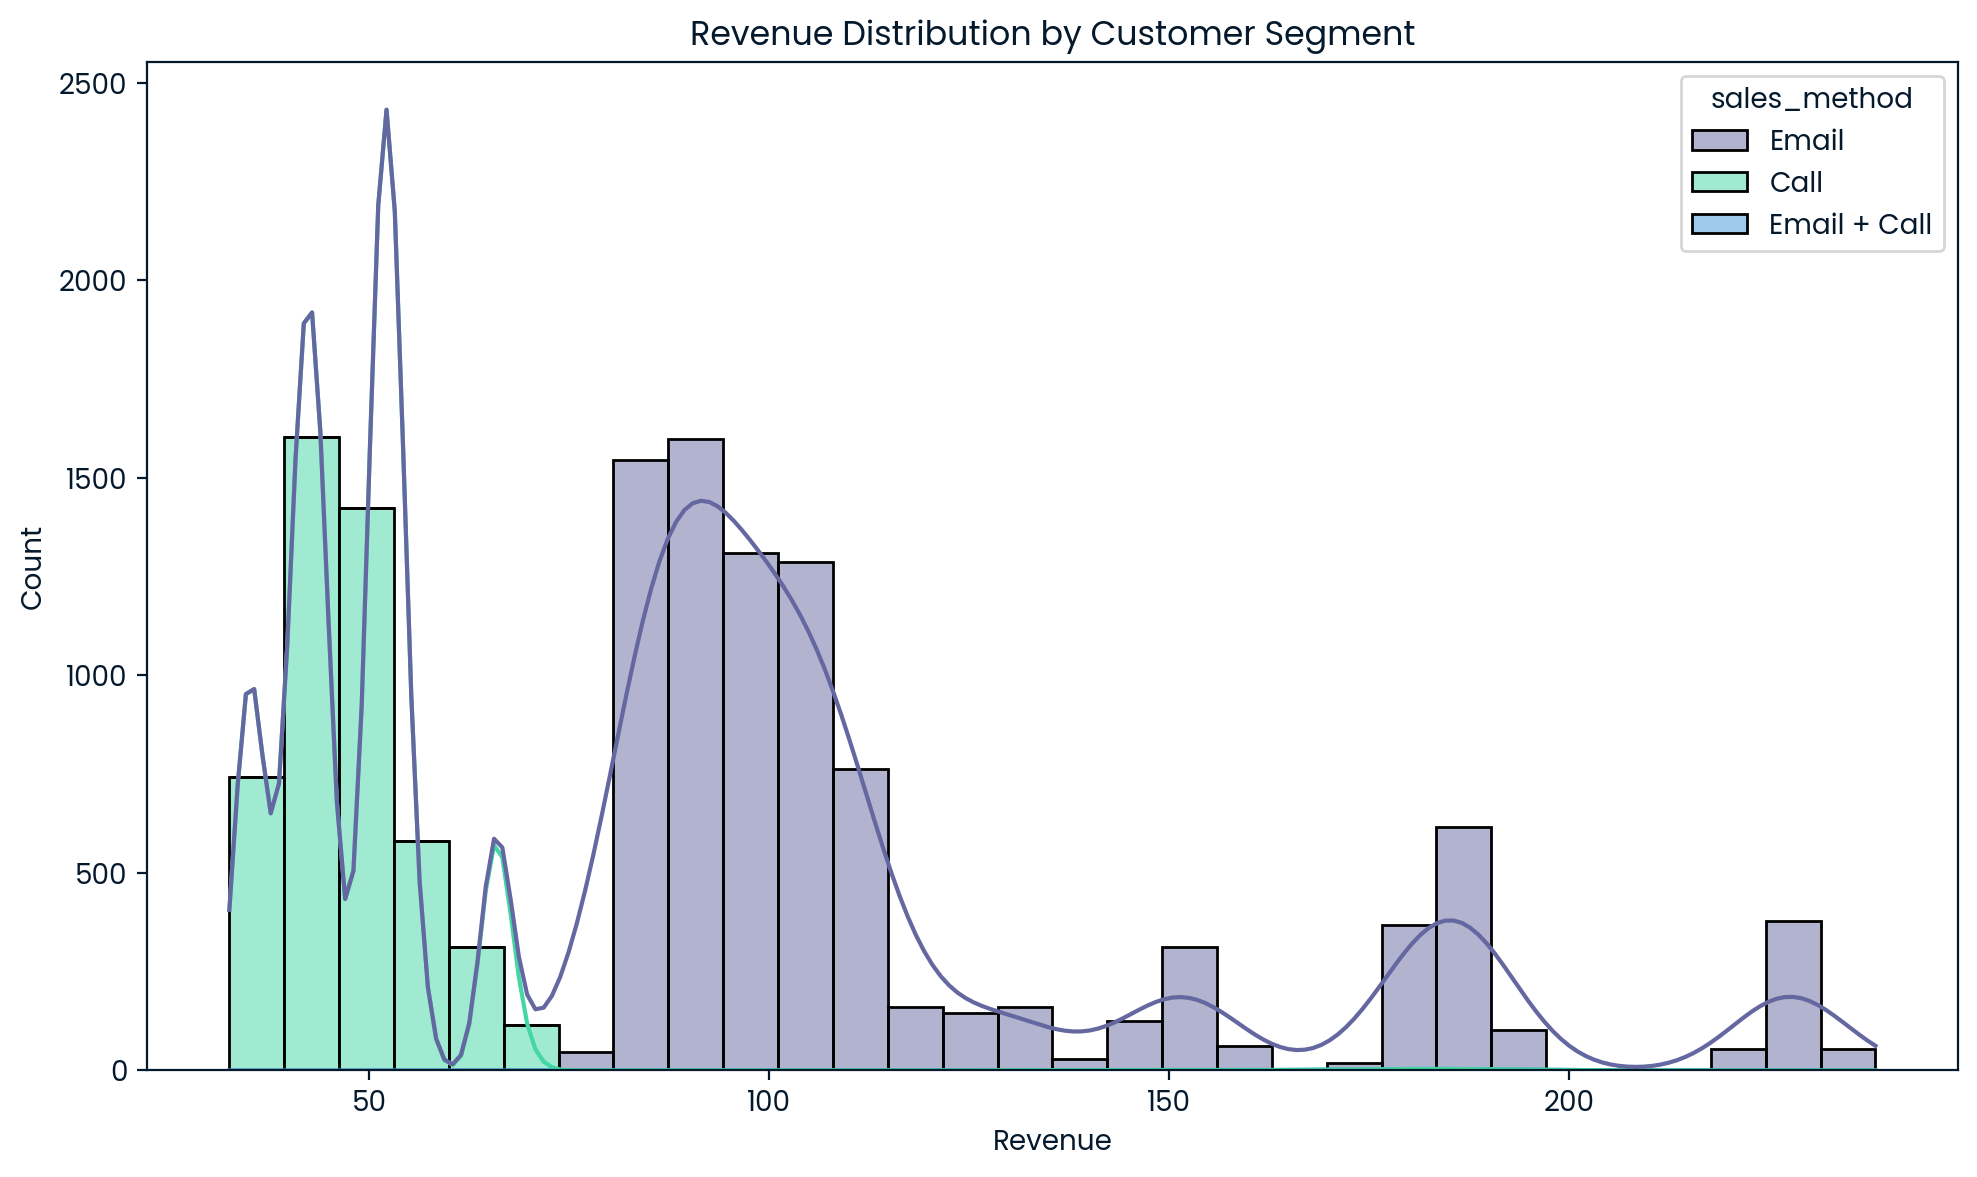

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='revenue', bins=30, kde=True, hue='sales_method', multiple='stack')
plt.title("Revenue Distribution by Customer Segment")
plt.xlabel("Revenue")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



## Observations

- multiple peaks, highlighting distinct clusters of customer behavior
- $45–$50, $90–$120, and $150–$200
- multimodal shape indicates that customers can be segmented based on their purchasing power and behavior
- right-skewed, meaning that most customers generate revenue below $120
- long tail of high-revenue customers exists 
- Call-based sales (labeled “Other”) dominate the low-revenue group ($45–$50)
- Email-based sales are concentrated in the mid-to-upper range


## Revenue by Method

- Constructing a abox plot between revenue and sales methos to methos the mutual behavior towards customers

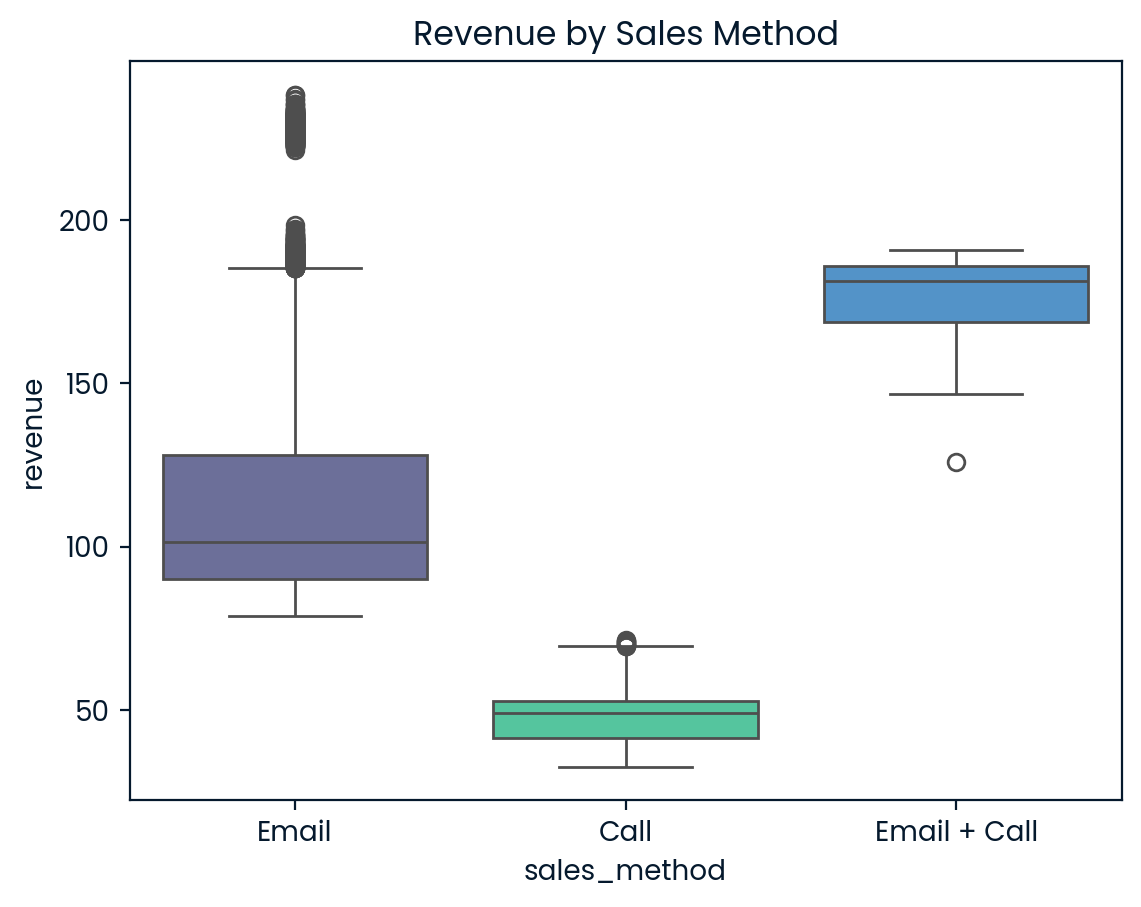

In [52]:

sns.boxplot(x='sales_method', y='revenue', data=df,hue="sales_method")
plt.title("Revenue by Sales Method")
plt.show()


## Observations 

- higher revenues are primarily generated by customers who engage through both Email and Call,
- highly effective for driving premium sales
- significant portion of mid-level revenue transactions are completed via Email alone
- highly efficient and scalable method for handling medium-tier customers
- Call-based sales method $45–$50
- lower-revenue customers are more likely to engage through phone calls
- Opportunities exist to improve mid-tier offerings
- Businesses should tailor sales strategies to match revenue potential - automated email,cost-efficient handling of low-revenue segments.

## Revenue Over Time by Method

- Revenue Over Time by sales_Method --plot 
- How is the Distribution of Customer Tenure by Sales Method -- plot 

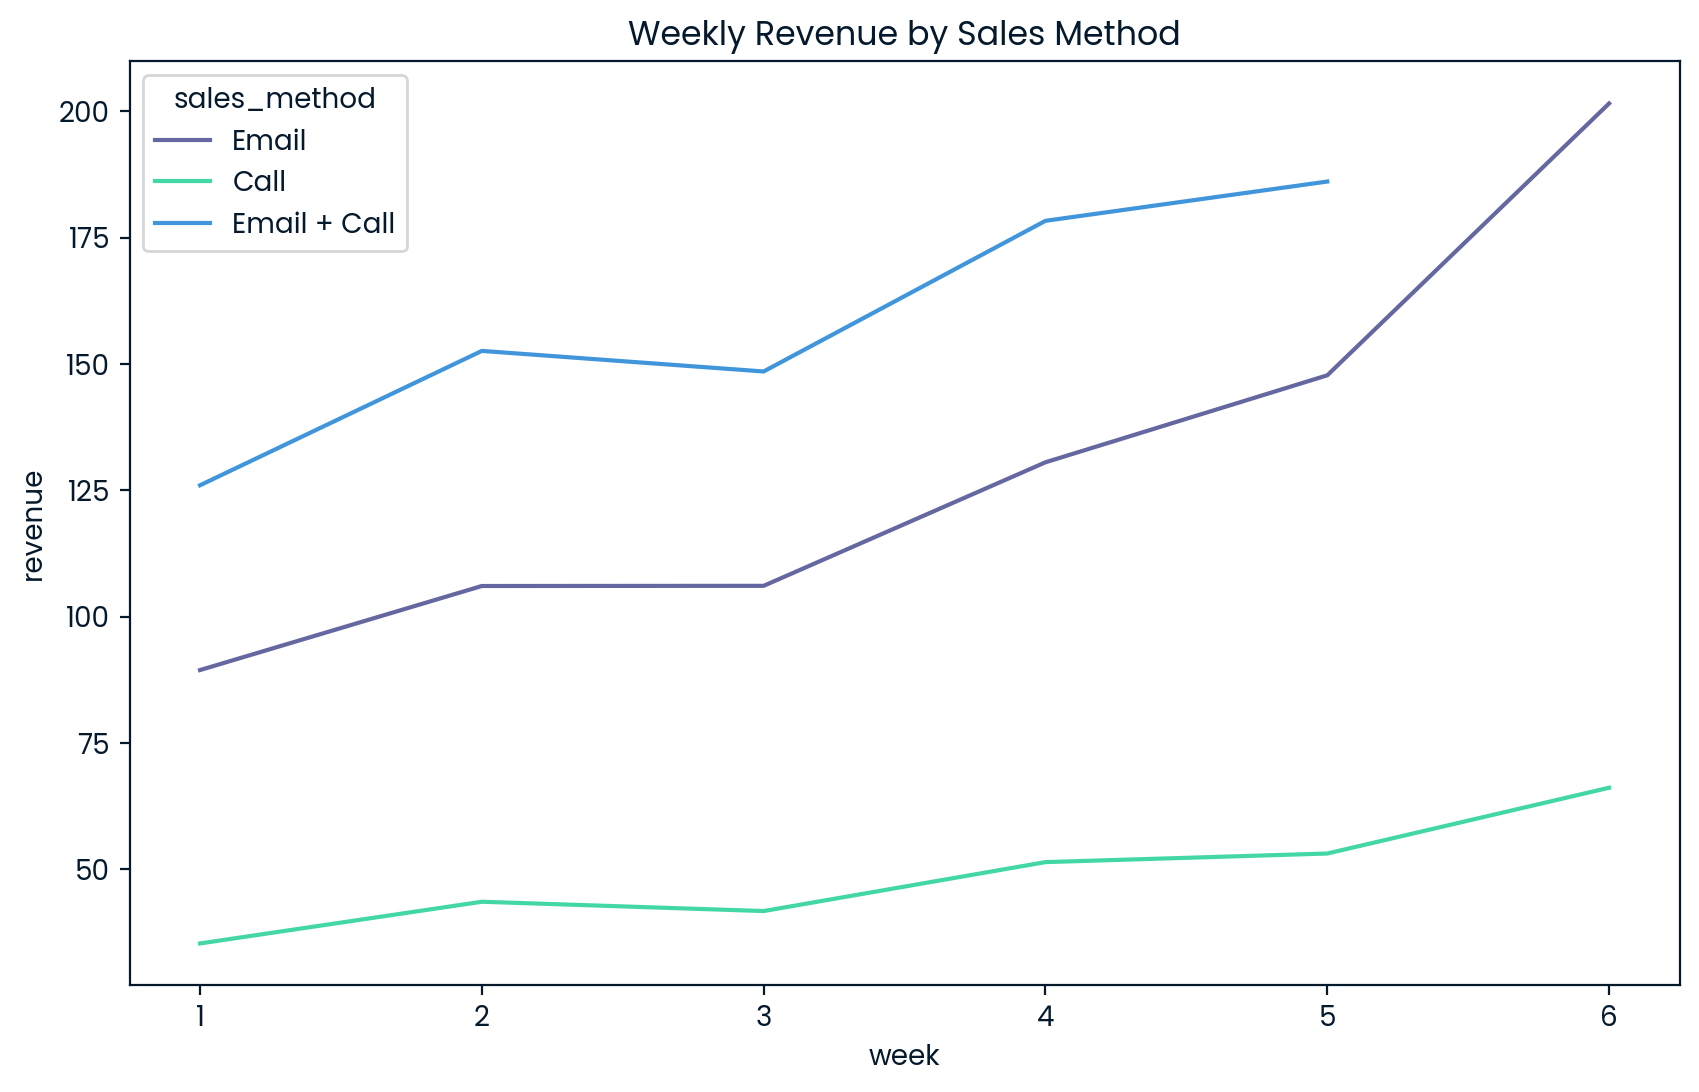

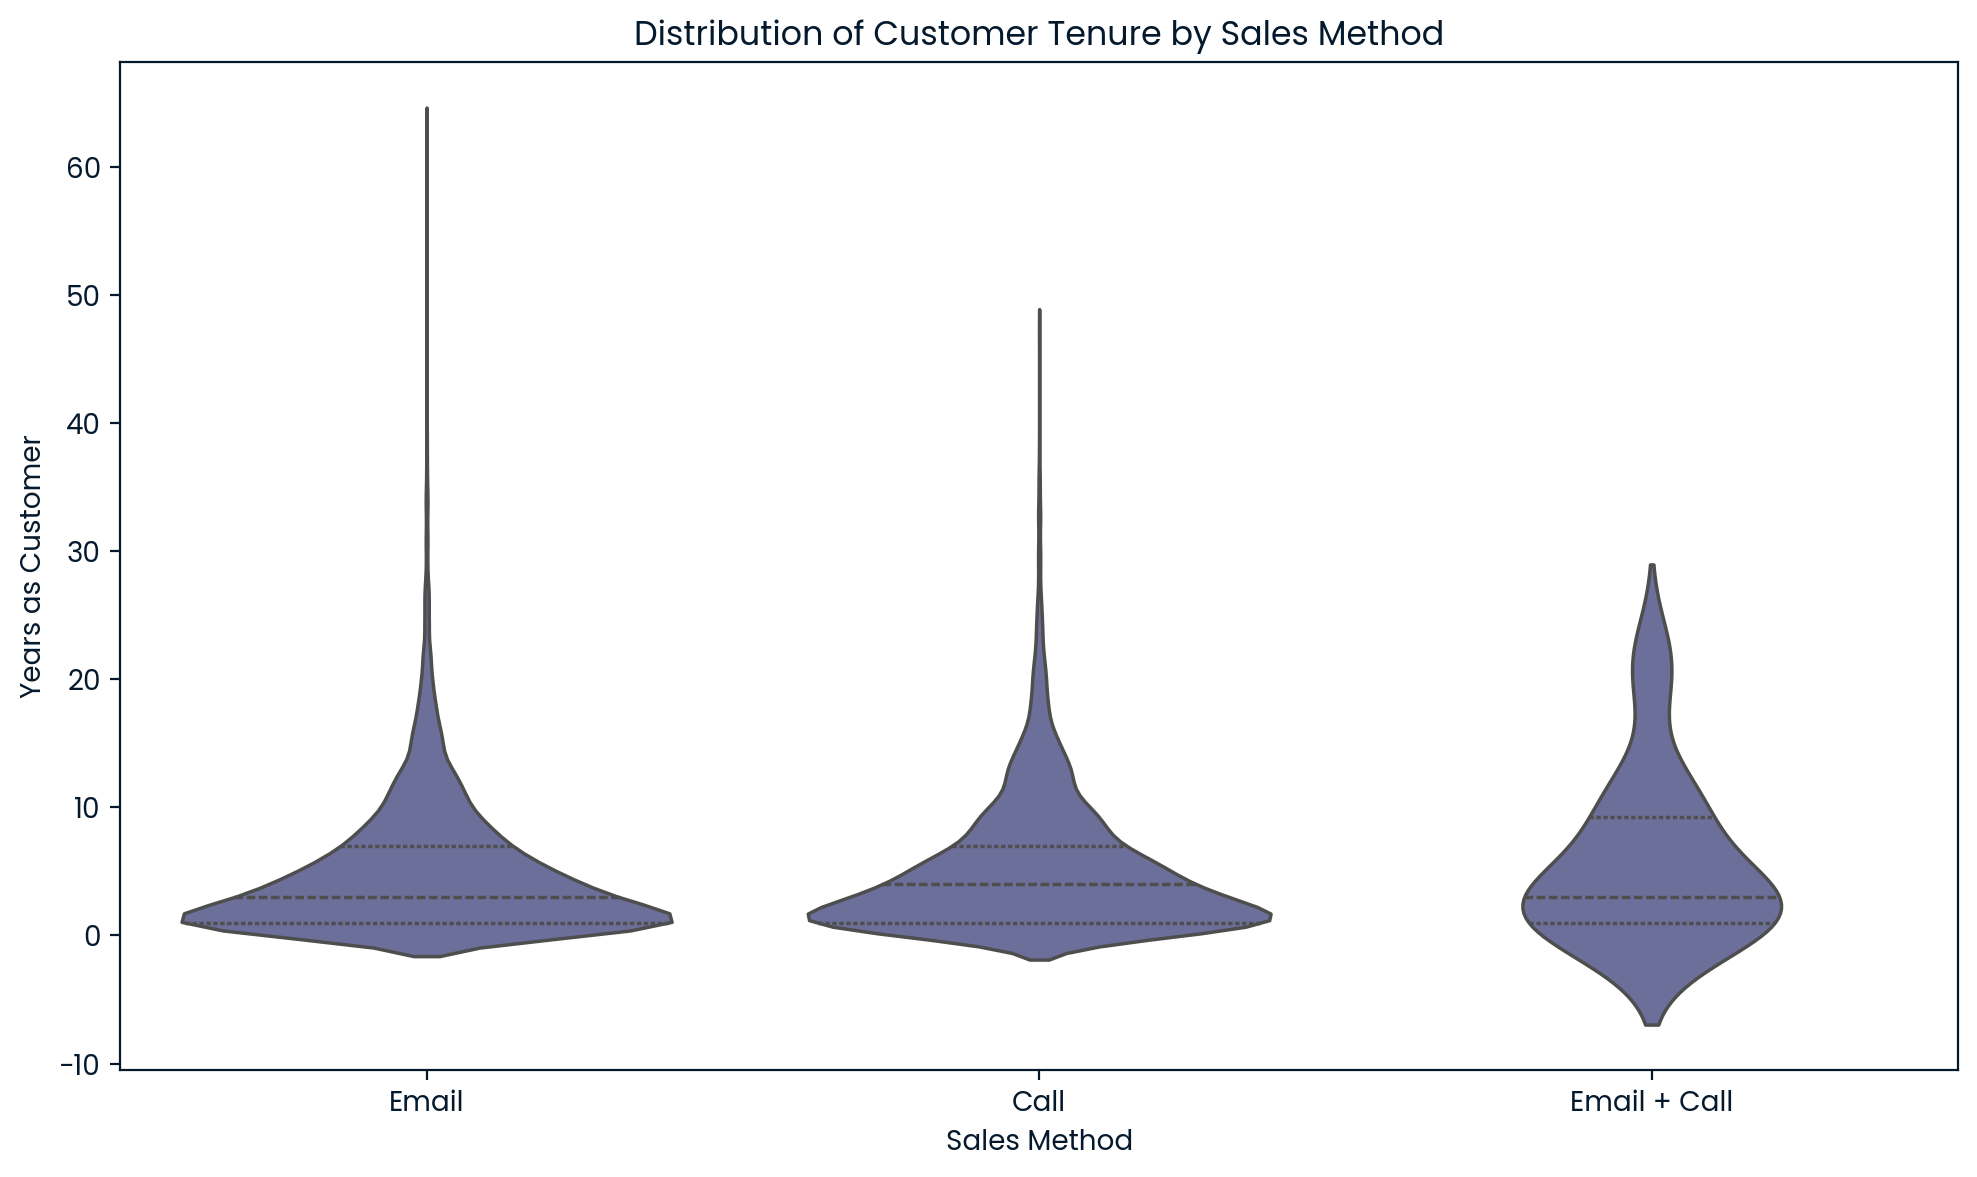

In [53]:
#Revenue Over Time by Method
plt.figure(figsize=(10,6))
sns.lineplot(x='week', y='revenue', hue='sales_method', data=df, estimator='mean', ci=None)
plt.title("Weekly Revenue by Sales Method")
plt.show()


#Distribution of Customer Tenure by Sales Method
df['years_as_customer'] = pd.to_numeric(df['years_as_customer'], errors='coerce')
plt.figure(figsize=(10, 6))
sns.violinplot(x='sales_method', y='years_as_customer', data=df, inner='quartile')
plt.title('Distribution of Customer Tenure by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('Years as Customer')
plt.tight_layout()
plt.show()







## Observations 

- This trend grows stronger in later weeks, indicating that email campaigns are increasingly effective over time.
- distribution is wider at the lower range (0–3 years)
- longer tail, and a higher maximum
- popular across all tenure groups
- call shape is similar but more compact
- shorter to mid-range tenures.
- less skewed toward long-tenure
- median and interquartile ranges
- more outliers and higher variance in years
- Push Email for long-term loyalty campaigns
- Use Calls for onboarding and nurturing newer customers


## Defining & Calculate a Business Metric

- Average Revenue per Customer by Sales Method provides powerful insights into how effective each sales strategy is in generating value per customer.

In [54]:


avg_revenue = df.groupby('sales_method')['revenue'].mean().reset_index()
print("Average Revenue per Customer by Method:\n", avg_revenue)


Average Revenue per Customer by Method:
    sales_method     revenue
0          Call   47.597467
1         Email  118.038902
2  Email + Call  173.477000


## Observations 

- each Sales Metho and Avg. Revenue per Customer  are calulated 
- Emai---->118.04
- - Indicates that email is efficient and scalable, especially for mid-tier customers
- Email + Call----->	173.48
- - Indicates that multi-channel engagement (email follow-ups + calls) results in more valuable sales
- Other (Call) ---->	47.60
- - Likely used by low-value or first-time customers who require more hand-holding
- - less proactive online research before purchasing

## Compare Customer Behavior

- Customer Engagement Indicator
- It helps understand how much nurturing a customer needs before converting.

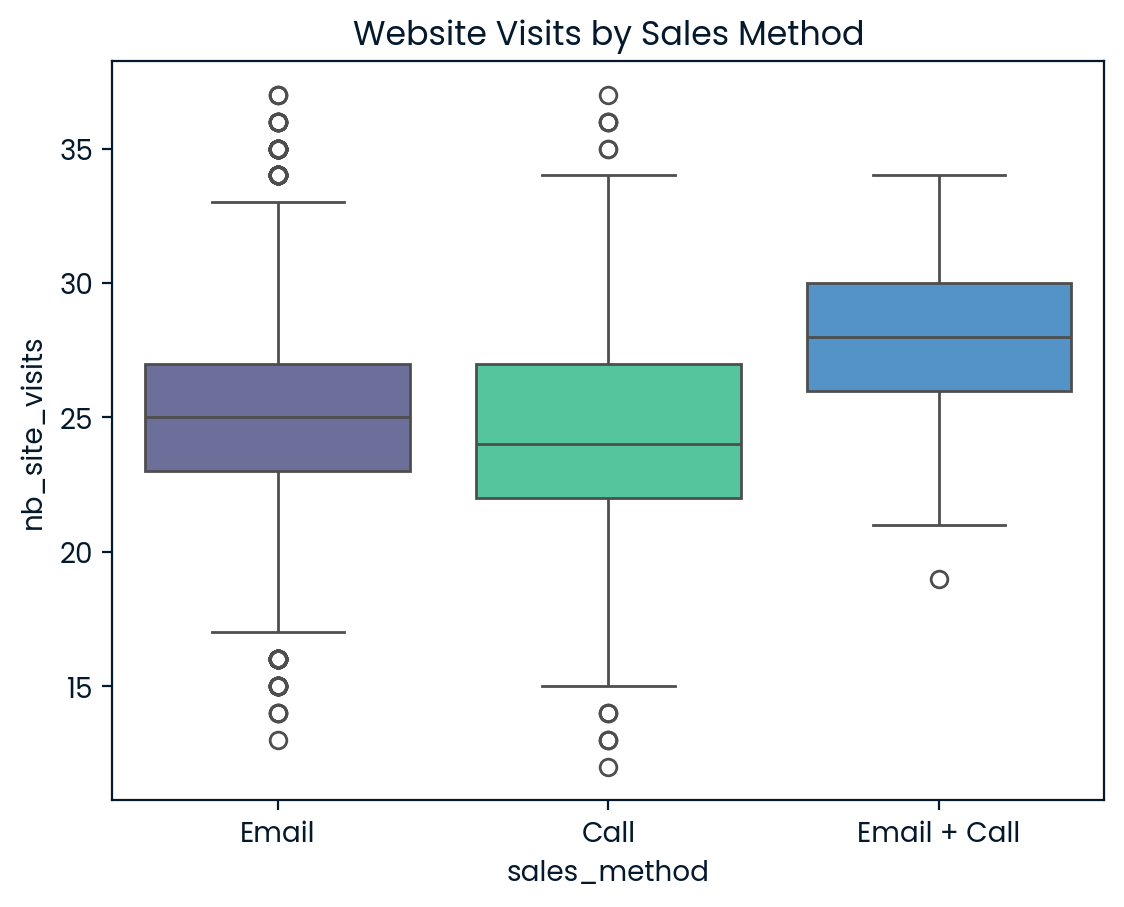

In [55]:

import seaborn as sns
sns.boxplot(x='sales_method', y='nb_site_visits', data=df,hue="sales_method")
plt.title("Website Visits by Sales Method")
plt.show()



## Observations 

- Email + Call
- These customers are more engaged digitally and receive follow-up calls, often associated with higher-ticket or complex products.
- Email customers may be moderately engaged, but with less need for intensive follow-up.


## Business implications 

- Scale up "Email + Call" strategy for high-value customers.
- Introduce mid-tier product bundles to fill the gap between $120–$150
- low-spending customers (Call) toward Email to reduce cost-per-sale
- cashbacks and dicounts 
- Encourage first-time visitors
- Motivate hesitant users
- Build trust and familiarity


In [2]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Load your data ---
df = pd.read_csv('corrected_data.csv')





In [3]:
# --- Set Streamlit page config ---
st.set_page_config(page_title="Sales Dashboard", layout="wide")

st.title("Sales & Customer Analytics Dashboard")

st.header("1. Number of Customers per Sales Method")
customer_count = df.groupby('sales_method')['customer_id'].nunique()
fig1, ax1 = plt.subplots()
customer_count.plot(kind='bar', ax=ax1, color=sns.color_palette('Set2'))
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Sales Method')
st.pyplot(fig1)

st.header("2. Revenue Distribution by Customer Segment")
fig2, ax2 = plt.subplots()
sns.histplot(data=df, x='revenue', hue='sales_method', multiple='stack', ax=ax2, kde=True)
ax2.set_xlabel('Revenue')
ax2.set_ylabel('Customer Count')
st.pyplot(fig2)

st.header("3. Total Revenue by Sales Method")
revenue_by_method = df.groupby('sales_method')['revenue'].sum().sort_values(ascending=False)
fig3, ax3 = plt.subplots()
revenue_by_method.plot(kind='bar', ax=ax3, color=sns.color_palette('Set1'))
ax3.set_ylabel('Total Revenue')
ax3.set_xlabel('Sales Method')
st.pyplot(fig3)

st.header("4. Weekly Revenue by Sales Method")
# Assuming you have a 'date' or 'week' column; otherwise, this will need to be adjusted
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['week'] = df['date'].dt.isocalendar().week
    weekly_revenue = df.groupby(['week', 'sales_method'])['revenue'].sum().reset_index()
    fig4, ax4 = plt.subplots(figsize=(10,5))
    sns.lineplot(data=weekly_revenue, x='week', y='revenue', hue='sales_method', marker='o', ax=ax4)
    ax4.set_ylabel('Weekly Revenue')
    ax4.set_xlabel('Week Number')
    st.pyplot(fig4)
else:
    st.warning("No 'date' column found for weekly revenue visualization.")

st.header("5. Distribution of Customer Tenure by Sales Method")
if 'tenure' in df.columns:
    fig5, ax5 = plt.subplots()
    sns.boxplot(data=df, x='sales_method', y='tenure', ax=ax5, palette='Set3')
    ax5.set_ylabel('Customer Tenure')
    ax5.set_xlabel('Sales Method')
    st.pyplot(fig5)
else:
    st.warning("No 'tenure' column found for tenure distribution visualization.")

st.header("6. Number of Website Visits by Sales Method")
if 'website_visits' in df.columns:
    website_visits = df.groupby('sales_method')['website_visits'].sum()
    fig6, ax6 = plt.subplots()
    website_visits.plot(kind='bar', ax=ax6, color=sns.color_palette('Paired'))
    ax6.set_ylabel('Number of Website Visits')
    ax6.set_xlabel('Sales Method')
    st.pyplot(fig6)
else:
    st.warning("No 'website_visits' column found.")

st.markdown("---")
st.caption("Dashboard powered by Streamlit. Built by ChatGPT for your dataset.")

2025-06-25 14:51:39.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.781 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.836 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-25 14:51:39.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()